In [1]:
import graphlab as gl
import seaborn as sns

In [49]:
%matplotlib inline

In [2]:
%cd 'C:\Users\Rolex James\Documents\MOOCs\ML Univ of Washington\Classification\Resources\machine-learning-specialization-master\course-3'

C:\Users\Rolex James\Documents\MOOCs\ML Univ of Washington\Classification\Resources\machine-learning-specialization-master\course-3


In [3]:
loans = gl.SFrame('lending-club-data.gl/')

This non-commercial license of GraphLab Create is assigned to tolurotimibabalola@gmail.com and will expire on December 29, 2016. For commercial licensing options, visit https://dato.com/buy/.


2016-05-23 11:44:37,236 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: C:\Users\ROLEXJ~1\AppData\Local\Temp\graphlab_server_1464000276.log.0


In [4]:
loans_df = loans.to_dataframe()

In [5]:
features = list(loans_df.columns)

In [6]:
features[0]

'id'

In [7]:
type(features)

list

In [8]:
features.index('purpose')

20

In [12]:
loans_df['purpose'][0:4]

0       credit_card
1               car
2    small_business
3             other
Name: purpose, dtype: object

In [13]:
#Get all the purposes for loans in the data
print loans_df['purpose'].drop_duplicates()

0             credit_card
1                     car
2          small_business
3                   other
4                 wedding
8      debt_consolidation
14       home_improvement
15         major_purchase
16                medical
32                 moving
97               vacation
145                 house
Name: purpose, dtype: object


In [14]:
#One hot encoding for the purpose 'column'
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [15]:
#Recode bad_loans column
loans_df['safe_loans'] = loans_df['bad_loans'].apply(lambda x: +1 if x==0 else -1)

In [16]:
X = loans_df[['purpose', 'safe_loans']].values
purpose_le = LabelEncoder()

In [17]:
X[:,0] = purpose_le.fit_transform(X[:,0])
X

array([[1L, 1L],
       [0L, -1L],
       [9L, 1L],
       ..., 
       [6L, -1L],
       [2L, -1L],
       [1L, 1L]], dtype=object)

In [18]:
print X[:10]

[[1L 1L]
 [0L -1L]
 [9L 1L]
 [8L 1L]
 [11L 1L]
 [0L 1L]
 [9L -1L]
 [8L -1L]
 [2L 1L]
 [2L 1L]]


In [19]:
import numpy as np

In [20]:
print np.unique(X[:,0])

[0L 1L 2L 3L 4L 5L 6L 7L 8L 9L 10L 11L]


In [21]:
ohe = OneHotEncoder(categorical_features=[0])

In [22]:
purpose_ohe = ohe.fit_transform(X).toarray()

In [23]:
purpose_ohe[0:5]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]])

In [24]:
purpose_ohe.shape

(122607L, 13L)

In [25]:
type(purpose_ohe)

numpy.ndarray

In [26]:
import pandas as pd

In [35]:
colNames = list(loans_df['purpose'].drop_duplicates())
colNames = sorted(colNames) + ['safe_loans']
print colNames

['car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'small_business', 'vacation', 'wedding', 'safe_loans']


In [28]:
print sorted(colNames)

['car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'safe_loans', 'small_business', 'vacation', 'wedding']


In [36]:
#Convert it to a dataframe and give informative column names
purpose_ohe_df = pd.DataFrame(purpose_ohe, columns = colNames)
purpose_ohe_df.head(10)

,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation,wedding,safe_loans
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
loans_df['purpose'][0:10]

0           credit_card
1                   car
2        small_business
3                 other
4               wedding
5                   car
6        small_business
7                 other
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [47]:
#Sum columns of dataframe
#Get sum of the first 12 columns of dataframe
print np.sum(purpose_ohe_df.iloc[:,range(12)], axis = 0)

car                    2375.0
credit_card           22050.0
debt_consolidation    68233.0
home_improvement       7543.0
house                  1005.0
major_purchase         3877.0
medical                1607.0
moving                 1180.0
other                  9087.0
small_business         3264.0
vacation                860.0
wedding                1526.0
dtype: float64


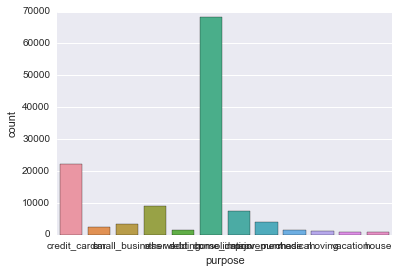

In [50]:
sns.countplot(x='purpose', data=loans_df)

In [51]:
#write to csv file
purpose_ohe_df.to_csv('loans_purpose_ohe.csv')